In [27]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import re

In [28]:
quotes = pd.read_csv('poindexter_quotes.csv')
quotes.head()

,quotes
0,And in the end\r\nwe were all just humans.. dr...
1,I loved her not for the way she danced with my...
2,Sometimes I sit alone under the stars and thin...
3,Your darkness is a symphony\r\nPlayed in explo...
4,It was rather beautiful: the way he put her in...


In [29]:
tokenizer = Tokenizer()
corpus = quotes['quotes']

In [30]:
corpus = corpus.apply(lambda x: re.sub('\r\n', '\n', x))

In [31]:
tokenizer.fit_on_texts(corpus)

In [32]:
word_index = tokenizer.word_index
word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'in': 5,
 'you': 6,
 'of': 7,
 'love': 8,
 'a': 9,
 'is': 10,
 'her': 11,
 'with': 12,
 'it': 13,
 'that': 14,
 'she': 15,
 'all': 16,
 'for': 17,
 'we': 18,
 'not': 19,
 'your': 20,
 'me': 21,
 'my': 22,
 'way': 23,
 'was': 24,
 'but': 25,
 'what': 26,
 'just': 27,
 'are': 28,
 'be': 29,
 'never': 30,
 'because': 31,
 'how': 32,
 'things': 33,
 'like': 34,
 'do': 35,
 'could': 36,
 'if': 37,
 'will': 38,
 'they': 39,
 'beautiful': 40,
 'no': 41,
 'world': 42,
 'into': 43,
 'us': 44,
 'them': 45,
 'our': 46,
 'want': 47,
 'am': 48,
 'up': 49,
 'as': 50,
 'an': 51,
 'on': 52,
 'only': 53,
 'inside': 54,
 'have': 55,
 'at': 56,
 'when': 57,
 'know': 58,
 'let': 59,
 'were': 60,
 'humans': 61,
 'understand': 62,
 'this': 63,
 'too': 64,
 'about': 65,
 'give': 66,
 'earth': 67,
 'idea': 68,
 'loved': 69,
 'silence': 70,
 'make': 71,
 'most': 72,
 'life': 73,
 'human': 74,
 'fell': 75,
 'words': 76,
 'by': 77,
 'one': 78,
 'around': 79,
 'fall': 80,

In [33]:
total_words = len(word_index)+1
print(f'Total words: {total_words}')

Total words: 635


In [34]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [35]:
print(xs[6])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  5
  1 84 18 60 16]


In [36]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 149, 100)          63500     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               234496    
_________________________________________________________________
dense_1 (Dense)              (None, 635)               163195    
Total params: 461,191
Trainable params: 461,191
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(xs, ys, epochs=25, verbose=1)

Epoch 1/25
2040/2040 [==============================] - 67s 33ms/sample - loss: 5.9270 - acc: 0.0480
Epoch 2/25
2040/2040 [==============================] - 66s 32ms/sample - loss: 5.2098 - acc: 0.0779
Epoch 3/25
2040/2040 [==============================] - 65s 32ms/sample - loss: 4.4404 - acc: 0.1377
Epoch 4/25
2040/2040 [==============================] - 66s 32ms/sample - loss: 3.3490 - acc: 0.2608
Epoch 5/25
2040/2040 [==============================] - 69s 34ms/sample - loss: 2.3010 - acc: 0.4490
Epoch 6/25
2040/2040 [==============================] - 66s 32ms/sample - loss: 1.3731 - acc: 0.6701
Epoch 7/25
2040/2040 [==============================] - 66s 32ms/sample - loss: 0.7349 - acc: 0.8338
Epoch 8/25
2040/2040 [==============================] - 67s 33ms/sample - loss: 0.3815 - acc: 0.9240
Epoch 9/25
2040/2040 [==============================] - 68s 34ms/sample - loss: 0.1951 - acc: 0.9676
Epoch 10/25
2040/2040 [==============================] - 65s 32ms/sample - loss: 0.1094 - a

In [24]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

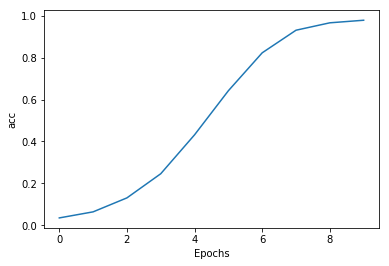

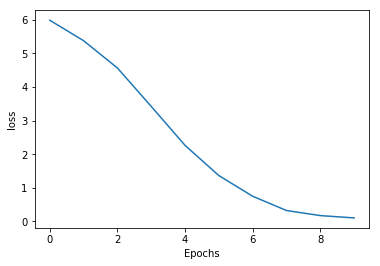

In [25]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [47]:
seed_text = "The black sheep is"
next_words = 15
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

The black sheep is i loved her not for the way she danced with my angels but for the


In [ ]:
Myna my love is all things men want to love but could never handle 
for silence that i will be a fool not to notice
the way the sunshine played with her hair in love with noise
if they refuse to applaud you it isn't because your music isn't beautiful
it is because they have no idea how to love

In [ ]:
Myna my dear come i will never be a morning person
for the moon and i are too much in love with the way her loneliness fell softly and suddenly asleep in his chest
we we love them only to uncurl our fingers later and softly give them back to the earth
sing until your lungs cave in be silent until the world